### Binary search trees

A binary tre is a tree data structure in which each node can have a maximum of 2 children. It means that each node in a binary tree can have either one, two, or no children. Each node in a binary tree contains data and references to its children. Both children are names as left and right child according to their position. 

In [1]:
# Binary tree node in python

class BinaryTreeNode:
    def __inti__(self, data):
        self.data = data
        self.left = None
        self.right = None

The binary search tree have the following properties:
1. No duplicate elements
2. The element at the left child is always less than the element at the current node.
3. The left subtree of a node has all elements less than the current node.
4. The element at the right child of a node is always greater than the element at the current node.
5. The right subtree of a node has all elements greater than the current node.
 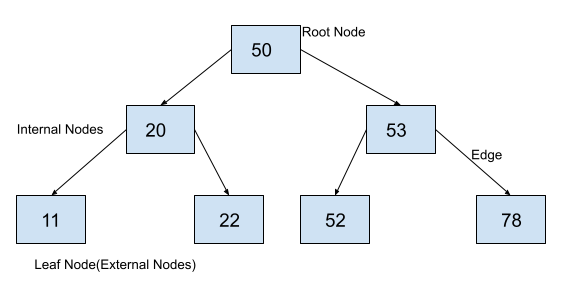

If we want to insert elements into a binary tree, three conditions may arise:
1. The current node can be empty and we will then create a new node with the element to be inserted and then assign the new node to the current node.
2. If the element is greater than the current we will insert it at the right subtree.
3. And if it is less, then we do it at the left subtree.

In [8]:
class BinaryTreeNode:
    def __init__(self, data):
        self.data = data
        self.left = None
        self.right = None
    
def insert(root, newValue):
    # If the search tree is empty, create a new node and declare it as the root
    if root is None:
        root = BinaryTreeNode(newValue)
        return root
    #If the newValue is less, add it to the left subtree
    if newValue < root.data:
        root.left = insert(root.left, newValue)
    else:
        root.right = insert(root.right, newValue)
    return root

root = insert(None, 50)
insert(root, 20)
insert(root, 53)
insert(root, 11)
insert(root, 22)
insert(root, 52)
insert(root, 78)
insert(root, 2)
insert(root, 3)
insert(root, 54)
insert(root, 32)
insert(root, 66)
insert(root, 12)
node1 = root
node2 = node1.left
node3 = node1.right
node4 = node2.left
node5 = node2.right
node6 = node3.left
node7 = node3.right
print("Root Node is:")
print(node1.data)

print("left child of the node is:")
print(node1.left.data)
print("right child of the node is:")
print(node1.right.data)

Root Node is:
50
left child of the node is:
20
right child of the node is:
53


In [9]:
class Node:
    def __init__(self, key):
        self.key = key       # The value of the node.
        self.left = None     # Left child.
        self.right = None    # Right child.

class BinarySearchTree:
    def __init__(self):
        self.root = None

    def insert(self, key):
        """Insert a key into the BST."""
        if self.root is None:
            self.root = Node(key)
        else:
            self._insert_recursive(self.root, key)

    def _insert_recursive(self, node, key):
        """Helper method to insert recursively."""
        if key < node.key:
            if node.left is None:
                node.left = Node(key)
            else:
                self._insert_recursive(node.left, key)
        elif key > node.key:
            if node.right is None:
                node.right = Node(key)
            else:
                self._insert_recursive(node.right, key)
        else:
            # If key == node.key, we choose not to insert duplicates.
            pass

    def search(self, key):
        """Search for a key in the BST. Returns the node if found, else None."""
        return self._search_recursive(self.root, key)

    def _search_recursive(self, node, key):
        """Helper method to search recursively."""
        if node is None:
            return None
        if key == node.key:
            return node
        elif key < node.key:
            return self._search_recursive(node.left, key)
        else:
            return self._search_recursive(node.right, key)

    def in_order_traversal(self):
        """Perform an in-order traversal of the BST.
        This will return the elements in sorted order."""
        result = []
        self._in_order_recursive(self.root, result)
        return result

    def _in_order_recursive(self, node, result):
        """Helper method for in-order traversal."""
        if node:
            self._in_order_recursive(node.left, result)
            result.append(node.key)
            self._in_order_recursive(node.right, result)

    def delete(self, key):
        """Delete a key from the BST if it exists."""
        self.root = self._delete_recursive(self.root, key)

    def _delete_recursive(self, node, key):
        if node is None:
            return None

        if key < node.key:
            node.left = self._delete_recursive(node.left, key)
        elif key > node.key:
            node.right = self._delete_recursive(node.right, key)
        else:
            # Node found. Now, handle three cases:

            # Case 1: Node with only one child or no child.
            if node.left is None:
                return node.right
            elif node.right is None:
                return node.left

            # Case 2: Node with two children.
            # Get the in-order successor (smallest in the right subtree).
            successor = self._min_value_node(node.right)
            node.key = successor.key
            # Delete the in-order successor.
            node.right = self._delete_recursive(node.right, successor.key)
        return node

    def _min_value_node(self, node):
        """Get the node with the minimum key value found in that tree."""
        current = node
        while current.left is not None:
            current = current.left
        return current

# Example usage:
if __name__ == "__main__":
    bst = BinarySearchTree()
    # Inserting nodes into the BST.
    for key in [50, 30, 70, 20, 40, 60, 80]:
        bst.insert(key)

    # In-order traversal (should print sorted keys).
    print("In-order Traversal:", bst.in_order_traversal())

    # Searching for a key.
    search_key = 40
    result = bst.search(search_key)
    if result:
        print(f"Key {search_key} found in BST.")
    else:
        print(f"Key {search_key} not found in BST.")

    # Deleting a key.
    bst.delete(70)
    print("In-order Traversal after deleting 70:", bst.in_order_traversal())


In-order Traversal: [20, 30, 40, 50, 60, 70, 80]
Key 40 found in BST.
In-order Traversal after deleting 70: [20, 30, 40, 50, 60, 80]


1. Node Class:

Each node holds a key and has pointers to its left and right children.

2. Insertion (insert and _insert_recursive):

Start at the root.
If the key is less than the current node’s key, recursively insert into the left subtree.
If greater, do so in the right subtree.
Duplicate values are ignored in this example.

3. Searching (search and _search_recursive):

Recursively traverse the tree using the BST property: move left if the key is less, right if greater, until the key is found or a leaf is reached.

4. In-order Traversal (in_order_traversal and _in_order_recursive):

Visits nodes in left-root-right order.
This traversal produces a sorted list of keys for BSTs.

5. Deletion (delete and _delete_recursive):

Locate the node to be deleted.
Handle three cases:
Leaf Node or Single Child: Replace the node with its child.
Two Children: Find the in-order successor (minimum in right subtree), replace the node's key with that value, and then delete the successor.